# Business analytics / Data Analysis 

## Introduction

In [233]:
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
# some params to set
%matplotlib inline 

plt.rcParams['figure.figsize'] = [16, 8]
np.random.seed(1234)

Load the data in a dataframe.

In [235]:
df = pd.read_excel("data\\Centris_Final_Dataset_Clean.xlsx")

Check the shape of the dataframe: (rows, columns). Originally, there was ~9060 observations but I dropped some while cleaning.

In [236]:
print(df.shape)

(8717, 36)


### Selection

Nous voulons maintenant exclure les proprietes ne correspondant pas a nos criteres:

- Le prix du pied/carre doit etre inferieur a 5$;
- Le terrain doit ce trouver a moins de 2.1 heures de la residence;

In [237]:
df = df[(df.Duration_H <= 2.1) & (df.Prix_PC <= 5)]

Ce qui nous fait passer de 8717 terrains a 3988. On remarque la meme tendance qu'enonce plus tot.

In [238]:
print(df.shape)

(3988, 36)


Check the size of the dataframe. Size is the number of 'cells' or rows X columns.

In [239]:
print(df.size)

143568


Check the number of dimensions. Return 1 if Series. Otherwise return 2 if DataFrame.

In [240]:
print(df.ndim)

2


Check the data types of the variables.

In [241]:
print(df.dtypes)

Superficie                      int64
Prix                            int64
Ville                          object
Lien                           object
Polldate               datetime64[ns]
Prix_PC                       float64
Adresse                        object
Centris                         int64
Description                    object
Z_Agricole                       bool
Z_Autre                          bool
Z_Commercial                     bool
Z_Forestier                      bool
Z_Industriel                     bool
Z_Recreotouristique              bool
Z_Residentiel                    bool
Z_Villegiature                   bool
Code_Postal                    object
Ville_Detail                   object
Water_front                      bool
Water_access                     bool
Water_plan                       bool
formatted_address              object
latitude                      float64
longitude                     float64
coord_type                     object
gmap_id     

Now, check the data itself:

In [242]:
df.head()

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
1,291214,58000,Saint-Colomban,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.20,"Côte Saint-Patrick, Saint-Colomban, J5K 1T1",24586948,"Superbe opportunité, votre propre domaine! Ter...",False,...,ChIJR_-SFVkoz0wRKNwEyVuBRig,postal_code,Saint-Colomban,Saint-Colomban,La Rivière-du-Nord Regional County Municipality,"Saint-Colomban, QC J5K 1T1","65,561.00","3,352.00",65.56,0.93
2,762300,35000,La Macaza,https://www.centris.ca/fr/terrain~a-vendre~la-...,2020-01-11,0.05,"Chemin des Cascades, La Macaza, J0T 1R0",25295553,Très beau terrain de 17 ACRES! prêt à construi...,False,...,ChIJmylGT5GHz0wRV7qKtv2YvUc,"administrative_area_level_3,political",La Macaza,La Macaza,Antoine-Labelle Regional County Municipality,"La Macaza, QC J0T 1R0","168,002.00","7,173.00",168.00,1.99
4,49320,39500,Saint-Damien,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.80,"Chemin Beaulieu, Saint-Damien, J0K 2E0",11705910,"Directement en bordure du Lac Quesnel, terrain...",False,...,ChIJ_d6yiI8ExkwRIrrqmCKQcVE,"locality,political",Saint-Damien,Saint-Damien,Matawinie Regional County Municipality,"Saint-Damien, QC J0K 2E0","111,420.00","4,864.00",111.42,1.35
7,43731,34999,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.80,"Chemin Gauthier, L'Ange-Gardien (Outaouais), J...",26905299,"Terrain boisé de 43730,9 pieds carrés situé à ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
8,1730680,230000,Saint-Michel-des-Saints,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.13,"Chemin de Saint-Ignace Nord, Saint-Michel-des-...",19597032,belle terre avec zonage permettant plusieurs a...,True,...,ChIJc3_Z-kG_xUwRSXoQmnHb-DI,postal_code,Saint-Michel-des-Saints,Saint-Michel-des-Saints,Matawinie,"Saint-Michel-des-Saints, QC J0K 3B0","157,040.00","7,074.00",157.04,1.97


### Data description

Descriptions des variables du dataset:

| Variable | Description | Usage | Source | Notes |
| :------- | :---------- | :---- | :----- | :---- |
| Superficie | Taille du terrain a vendre en pied/carre |  | Centris Listing | |
| Prix | Prix du terrain en dollars canadien | | Centris Listing | |
| Ville | Ville ou le terrain est situe |  | Centris Listing ||
| Lien | Hyperlien pour acceder au detail (Fiche sommaire) | | Centris Listing ||
| Polldate | Date ou le script a extrait l'information || Python: datetime.today() ||
| Prix_PC | Prix au pied/carre pour comparaison | | Calcul: Prix/Superficie ||
| Adresse | Adresse de la propriete a vendre | | Centris Fiche Individuelle | |
| Centris| No Centris de la fiche | | Centris Fiche Individuelle | |
| Description | Description de la propriete par le vendeur | | Centris Fiche Individuelle | |
| Z_Agricole | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Autre  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Commercial | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Forestier  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Industriel  | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Recreotouristique | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Residentiel   | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Z_Villegiature | Variable indicatrice creer a partir de 'Zonage' | | Centris Fiche Individuelle | |
| Code_Postal | Code postal extrait de l'adresse | | Centris Fiche Individuelle | |
| Ville_Detail | Detail extrait de l'adresse. Ce qui est entre parenthese. | | Centris Fiche Individuelle | |
| Water_front | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| Water_access | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| Water_plan  | Variable indicatrice creer a partir de 'Carac. additionnelles' || Centris Fiche Individuelle ||
| formatted_address | Adresse retournee par Gmap API | Pour fin de validation | Gmap Distance Matrix API | |
| latitude  | Latitude |  | Gmap Geolocalisation API | |
| longitude  | Longitude |  | Gmap Geolocalisation API | |
| coord_type   | Type de lieu | Pour fin de validation | Gmap Geolocalisation API | |
| gmap_id | Id du lieu | Pour fin de validation | Gmap Geolocalisation API | |
| gmap_type | Type de lieu que Google a compris | Pour fin de validation | Gmap Geolocalisation API | |
| quartier | administrative_area_level_3 |  | Gmap Geolocalisation API | |
| ville  | locality |  | Gmap Geolocalisation API | Lorsque 'ville' n'avait aucun retour, j'ai impute 'quartier'|
| region| administrative_area_level_2 |  | Gmap Geolocalisation API | |
| destination | destination_addresses | Pour fin de validation | Gmap Distance Matrix API | |
| Distance | Distance en metres de ma residence | | Gmap Distance Matrix API | | 
| Duration  | Temps en secondes de ma residence | | Gmap Distance Matrix API | | 
| Distance_KM | Distance en kilimetres de ma residence | | Calcul: Distance/1000 | | 
| Duration_H | Temps en heures de ma residence | | Calcul: Duration/3600 | | 

'Centris Listing' : https://www.centris.ca/fr/terrain~a-vendre?view=List

Statistiques descriptives de chacune des variables quantitatives.

In [243]:
# remove scientific notation
pd.options.display.float_format = '{:,.2f}'.format

df.describe()

,Superficie,Prix,Prix_PC,Centris,latitude,longitude,Distance,Duration,Distance_KM,Duration_H
count,"3,988.00","3,988.00","3,988.00","3,988.00","3,988.00","3,988.00","3,988.00","3,988.00","3,988.00","3,988.00"
mean,"479,124.71","145,784.07",1.29,"18,984,675.66",45.90,-73.78,"110,111.22","4,847.67",110.11,1.35
std,"2,401,839.74","457,115.80",1.15,"5,742,650.76",0.40,0.89,"35,376.52","1,245.06",35.38,0.35
min,"4,060.00","1,025.00",0.00,"8,256,992.00",45.01,-75.67,"7,124.00","1,113.00",7.12,0.31
25%,"34,651.25","33,000.00",0.46,"13,990,710.25",45.65,-74.37,"80,000.00","3,747.00",80.00,1.04
50%,"60,000.00","59,900.00",0.92,"18,907,825.00",45.95,-74.05,"102,364.00","4,785.00",102.36,1.33
75%,"128,628.25","114,500.00",1.73,"23,916,542.75",46.17,-73.14,"135,232.00","5,814.00",135.23,1.61
max,"63,530,953.00","16,300,000.00",5.00,"28,991,936.00",46.81,-71.63,"203,923.00","7,548.00",203.92,2.10


## Histogramme des prix au pied/carre

Text(0.5, 1.0, 'Histograme des Prix au P/C')

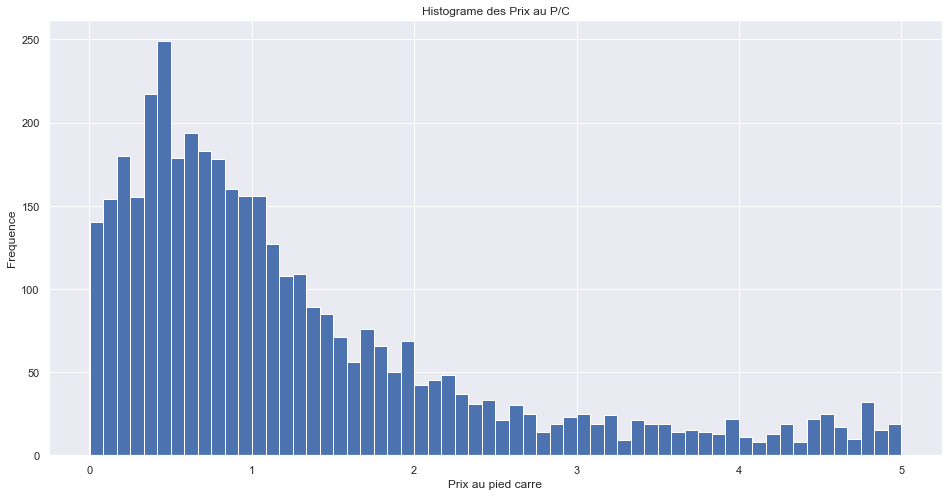

In [260]:
df.Prix_PC.hist(bins=60)
plt.xlabel('Prix au pied carre') 
plt.ylabel('Frequence')
plt.title("Histograme des Prix au P/C")

## Fonction de densite de probabilite pour Prix au pied carre

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

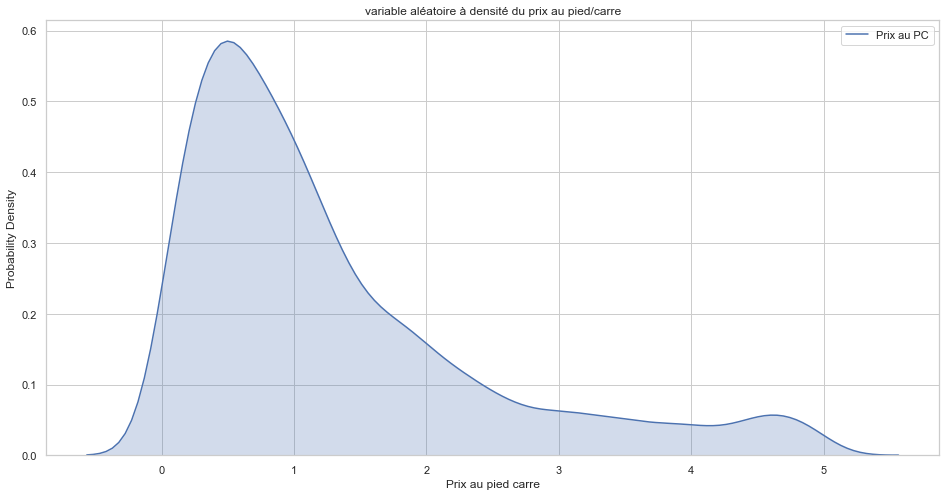

In [245]:
sns.set_style("whitegrid")
sns.kdeplot(df[df.Prix_PC <= 5].Prix_PC, color='b', shade=True, Label='Prix au PC') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")

### Prix au pied/carre versus distance de Montreal

Pour les terrains situes **a moins d'une heure de Montreal**, la tendance semble etre autour de 1\$/pc avec un biais vers la droite. Pour les terrains situes **a plus d'une heure de Montreal**, la tendance est plutot de 0.5\$/pc avec un biais vers la droite.

Les courbes de densites ci-dessous demontrent le phenomene.

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

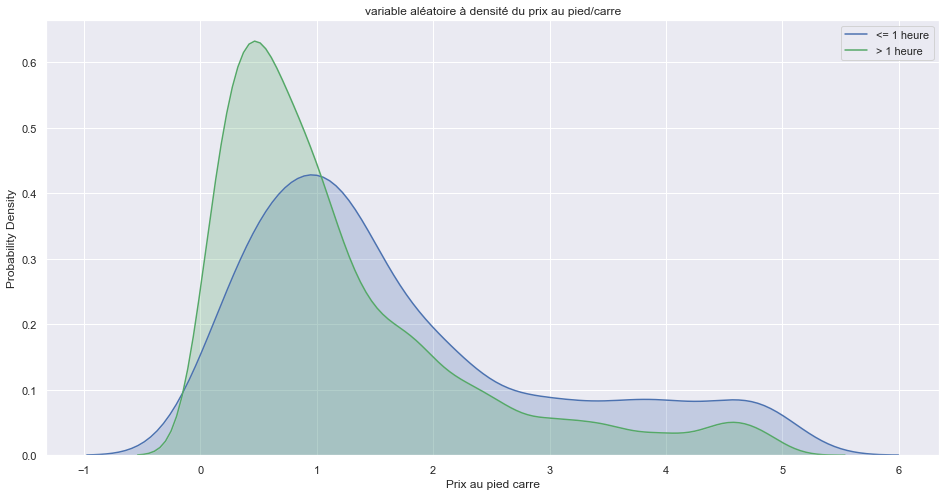

In [246]:
sns.set_style("darkgrid")

sns.kdeplot(df[(df.Prix_PC <= 5) & (df.Duration_H <= 1)].Prix_PC, color='b', shade=True, Label='<= 1 heure') 
sns.kdeplot(df[(df.Prix_PC <= 5) & (df.Duration_H > 1)].Prix_PC, color='g', shade=True, Label='> 1 heure') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")


### Tendance 'Acces a l'eau'

Il semble qu'un acces a l'eau fait diminuer le prix moyen du p/c. L'effet est tres faible somme toute. Ceci pourrait aussi etre fonction de la distance (plus d'acces a l'eau plus loin de Montreal)

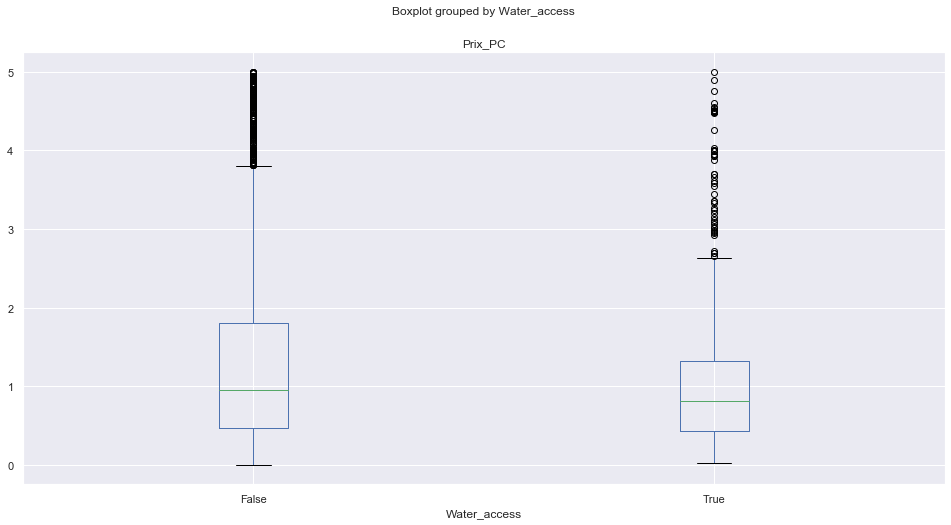

In [264]:
df.boxplot(column=['Prix_PC'], by='Water_access')

Une seconde validation en retirant les items ou le prix au pc est superieur a 3 reduit encore plus la difference. Mais les terrains avec acces a l'eau gardent une tendance a etre moins chers.

Text(0.5, 1.0, 'variable aléatoire à densité du prix au pied/carre')

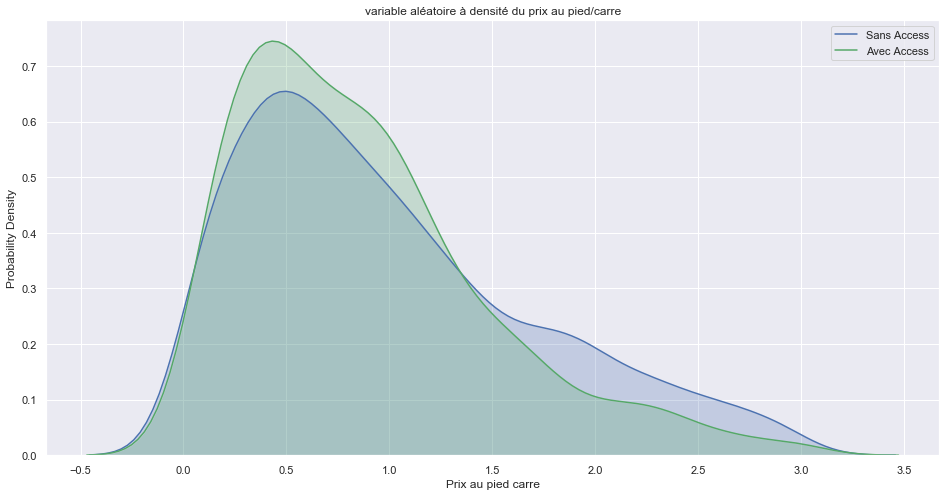

In [265]:
sns.set_style("darkgrid")

sns.kdeplot(df[(df.Water_access == 0) & (df.Prix_PC <= 3)].Prix_PC, color='b', shade=True, Label='Sans Access') 
sns.kdeplot(df[(df.Water_access == 1) & (df.Prix_PC <= 3)].Prix_PC, color='g', shade=True, Label='Avec Access') 

# Setting the X and Y Label 
plt.xlabel('Prix au pied carre') 
plt.ylabel('Probability Density')
plt.title("variable aléatoire à densité du prix au pied/carre")

## Bord de l'eau

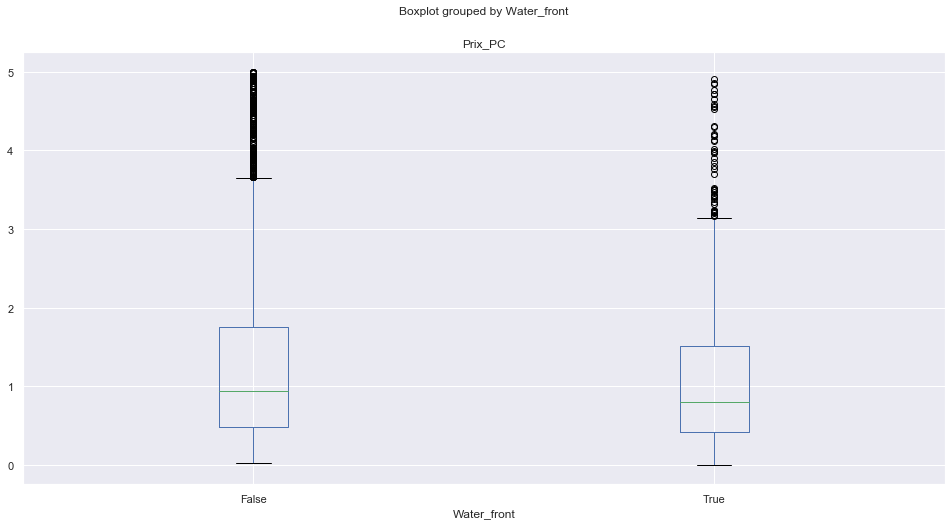

In [248]:
df.boxplot(column=['Prix_PC'], by='Water_front')

## Prix par region

Il y a des differences par region qu'il faudra investiguer. Il faudra faire attention au nombre d'individu par regions et probablement en reduire le nombre autour de 30-40.

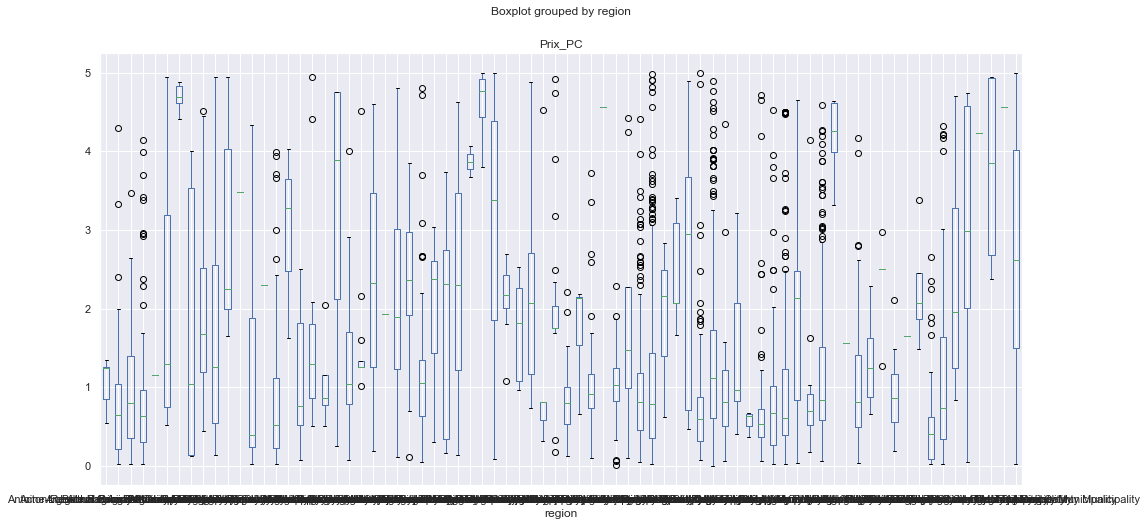

In [249]:
df.boxplot(column=['Prix_PC'], by='region')

In [250]:
print(len(df.region.unique()))

77


In [251]:
print(df.region.unique())

['La Rivière-du-Nord Regional County Municipality'
 'Antoine-Labelle Regional County Municipality'
 'Matawinie Regional County Municipality' nan 'Matawinie'
 'Portneuf Regional County Municipality'
 'Argenteuil Regional County Municipality'
 'Memphrémagog Regional County Municipality' 'Les Laurentides'
 "Les Pays-d'en-Haut Regional County Municipality"
 'Montcalm Regional County Municipality'
 'Les Laurentides Regional County Municipality' 'Memphrémagog'
 'Le Haut-Richelieu Regional County Municipality'
 'Le Val-Saint-François Regional County Municipality'
 "Les Collines-de-l'Outaouais Regional County Municipality"
 'Papineau Regional County Municipality' 'La Région-Sherbrookoise'
 'Maskinongé Regional County Municipality' 'Mauricie'
 "D'Autray Regional County Municipality"
 'Le Haut-Saint-Laurent Regional County Municipality'
 'Bécancour Regional County Municipality'
 'La Haute-Yamaska Regional County Municipality' 'Le Haut-Saint-Laurent'
 'Le Haut-Richelieu' "L'Assomption Regional Co

## Localisation des terrains

![Graph](Figure_1.png)

Les coordonnees du dataset nous donne le carre suivant:

In [252]:
Geo_Zone = ((df.longitude.min(), df.latitude.min(), df.longitude.max(), df.latitude.max()) )
print(Geo_Zone)

(-75.66691229999999, 45.009168, -71.6320142, 46.813268)


## Heatmap de terrains / concentration des terrains

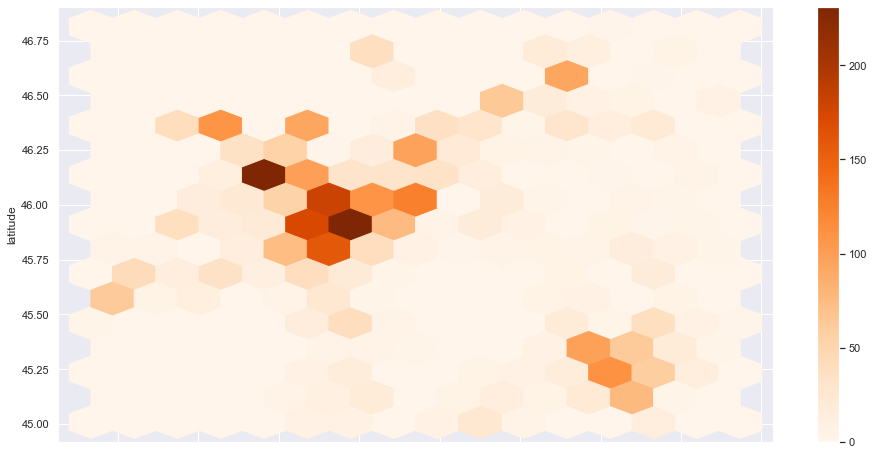

In [298]:
df.plot.hexbin(x ='longitude', y ='latitude', gridsize = 15, cmap ='Oranges') 

## Prix au PC versus Localisation

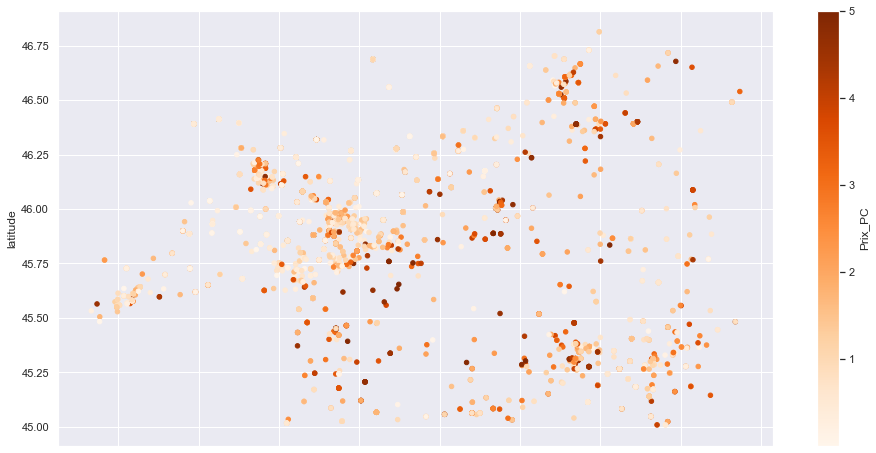

In [290]:
df.plot.scatter(x='longitude',y='latitude', c='Prix_PC', cmap ='Oranges')

### Zoom sur le cluster (46.10, -74)

In [254]:
df2 = df[(df['latitude'] >= 45.75) & (df['longitude'] <= -74.25) & (df['longitude'] >= -75)]

In [255]:
Geo_Zoom = ((df2.longitude.min(), df2.latitude.min(), df2.longitude.max(), df2.latitude.max()) )
print(Geo_Zoom)

(-74.9295965, 45.7519842, -74.25, 46.412958)


C'est environ le cadrilatere ci-dessous:

![Zoomin](Zoom.PNG)

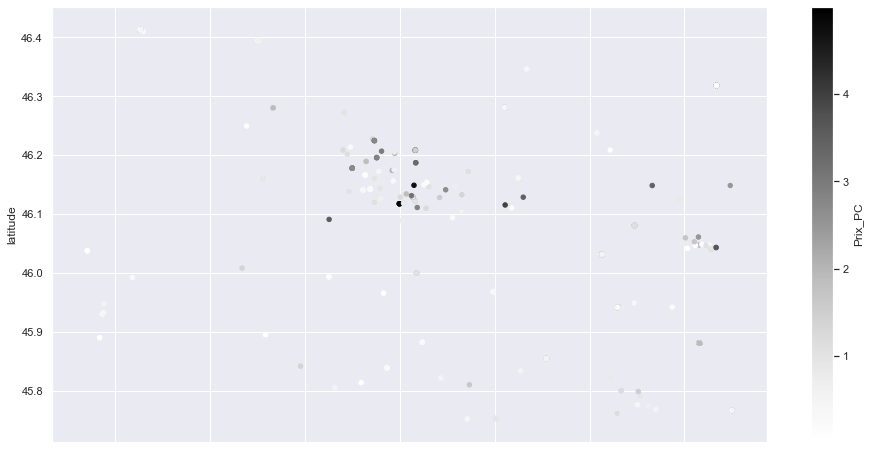

In [256]:
df2.plot.scatter(x='longitude',y='latitude', c='Prix_PC')

Cette selection nous donne 1077 proprietes.

In [257]:
print(df2.shape)

(1077, 36)


Ce qui couvre les villes suivantes (autour du Mont-Tremblant/Saint-Jovite):

In [258]:
df2.Ville.unique()

array(['La Macaza', 'Saint-Faustin/Lac-Carré', 'Amherst', 'Lac-Supérieur',
       'Gore', 'Sainte-Agathe-des-Monts', 'Lac-des-Plages', 'Labelle',
       'Saint-Donat', 'Mont-Tremblant', 'Harrington', 'Rivière-Rouge',
       'Brownsburg-Chatham', 'La Conception', "Saint-Adolphe-d'Howard",
       'Montcalm', 'Val-des-Lacs', 'Huberdeau', 'Morin-Heights',
       'Wentworth-Nord', 'Saint-Émile-de-Suffolk', 'Lantier', 'Wentworth',
       'Barkmere', 'Ivry-sur-le-Lac', 'Arundel', 'Brébeuf', 'Mille-Isles',
       'Lac-Tremblant-Nord', 'Boileau', 'Grenville-sur-la-Rouge', 'Namur',
       'Saint-Sauveur'], dtype=object)

## Top 6 plus chers du zoom

Les terrains sont beaucoup plus petits que la moyenne et beaucoup plus chers. Dans les plus chers du dataset complet. On voit qu'ils se trouvent majoritairement a Mont-Tremblant et St-Adolphe-DHoward.

In [259]:
df2.nlargest(6,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
6452,6983,34900,Saint-Adolphe-d'Howard,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,5.00,"Chemin des Gais-Lurons, Saint-Adolphe-d'Howard...",20306717,VENDEUR MOTIVÉ.... Terrain situé entre le numé...,False,...,ChIJmebwc5MUz0wRi_oDbluu4Q4,"administrative_area_level_3,political",Saint-Adolphe-d'Howard,Saint-Adolphe-d'Howard,Les Pays-d'en-Haut,"Saint-Adolphe-d'Howard, QC J0T 2B0","94,474.00","4,785.00",94.47,1.33
3139,65175,325000,Mont-Tremblant,https://www.centris.ca/fr/terrain~a-vendre~mon...,2020-01-11,4.99,"20, Chemin des Entailles, Mont-Tremblant, Quar...",23085062,SOMMETS-MONT-TREMBLANT- Au coeur du Village. P...,False,...,ChIJlVoVeBt1z0wRfrzwQ5fsXiA,postal_code,NaN,Mont-Tremblant,Les Laurentides Regional County Municipality,"Mont-Tremblant, QC J8E 1V1","125,934.00","5,253.00",125.93,1.46
4361,76424,375000,Mont-Tremblant,https://www.centris.ca/fr/terrain~a-vendre~mon...,2020-01-11,4.91,"23, Chemin des Entailles, Mont-Tremblant, Quar...",17500533,SOMMETS-MONT-TREMBLANT- Au coeur du Village. P...,False,...,ChIJlVoVeBt1z0wRfrzwQ5fsXiA,postal_code,NaN,Mont-Tremblant,Les Laurentides Regional County Municipality,"Mont-Tremblant, QC J8E 1V1","125,934.00","5,253.00",125.93,1.46
7906,122120,599000,Lac-Tremblant-Nord,https://www.centris.ca/fr/terrain~a-vendre~lac...,2020-01-11,4.91,"Rive du Lac-Tremblant, Lac-Tremblant-Nord, J8E...",9120691,"Lac tremblant Nord, superbe terrain vacant prè...",False,...,ChIJq8cFSyCdz0wRBzV-mRRUfXY,"neighborhood,political",La Conception,Mont-Tremblant,Les Laurentides Regional County Municipality,"Lac-Tremblant-Nord, QC J8E 1B3","139,556.00","5,969.00",139.56,1.66
2127,8202,39900,Saint-Adolphe-d'Howard,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,4.86,"Chemin des Tilleuls, Saint-Adolphe-d'Howard, J...",13850356,Terrain directement au bord du Lac Garry dans ...,False,...,ChIJmebwc5MUz0wRi_oDbluu4Q4,"administrative_area_level_3,political",Saint-Adolphe-d'Howard,Saint-Adolphe-d'Howard,Les Pays-d'en-Haut,"Saint-Adolphe-d'Howard, QC J0T 2B0","94,474.00","4,785.00",94.47,1.33
1619,98651,475000,Mont-Tremblant,https://www.centris.ca/fr/terrain~a-vendre~mon...,2020-01-11,4.81,"12, Chemin de la Goutterelle, Mont-Tremblant, ...",28832867,SOMMETS-MONT-TREMBLANT- Au coeur du Village. P...,False,...,ChIJlVoVeBt1z0wRfrzwQ5fsXiA,postal_code,NaN,Mont-Tremblant,Les Laurentides Regional County Municipality,"Mont-Tremblant, QC J8E 1V1","125,934.00","5,253.00",125.93,1.46


## Top 6 moins chers



In [266]:
df2.nsmallest(6,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
6263,9781683,175000,Lac-des-Plages,https://www.centris.ca/fr/terre~a-vendre~lac-d...,2020-01-11,0.02,"Chemin du Tour-du-Lac, Lac-des-Plages, J0T 1K0",26379972,"Secteur Lac des Plages, terre de 224 acres d'a...",False,...,ChIJ4cjKY9Giz0wRROJV5CZfOcU,"administrative_area_level_3,political",Lac-des-Plages,Lac-des-Plages,Papineau Regional County Municipality,"Lac-des-Plages, QC J0T 1K0","170,272.00","7,107.00",170.27,1.97
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
3048,6229080,129900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",19155599,"Superbe terre de 143 acres, à 30 min de Trembl...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
2631,4527101,99900,Val-des-Lacs,https://www.centris.ca/fr/terrain~a-vendre~val...,2020-01-11,0.02,"Chemin de Val-des-Lacs, Val-des-Lacs, J0T 2P0",12857567,Immense terrain de plus 4 500 000 pc avec 2 op...,False,...,ChIJu0iadc96z0wRVBl0eOpgWg0,"administrative_area_level_3,political",Val-des-Lacs,Val-des-Lacs,Les Laurentides Regional County Municipality,"Val-des-Lacs, QC J0T 2P0","133,566.00","5,909.00",133.57,1.64
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
3619,6011280,146000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",26677058,À moins de 2 heures de Montréal et d'Ottawa. M...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94


## Analysis

In [285]:
dfcheap = df[(df.Prix <= 85000) & (df.Prix_PC > 0.01)]
len(dfcheap)

2648

In [286]:
dfcheap.nsmallest(10,'Prix_PC')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
8448,4290660,74900,Chénéville,https://www.centris.ca/fr/terrain~a-vendre~che...,2020-01-11,0.02,"Chemin Bédard, Chénéville, J0V 1E0",15467044,Magnifique terrain boisé de 98.5 acres situé p...,False,...,ChIJgWwIzKizz0wRd8jNr0Omh5U,"locality,political",Chénéville,Chénéville,Papineau,"Chénéville, QC J0V 1E0","156,491.00","6,426.00",156.49,1.78
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
6217,48014,1125,Gatineau,https://www.centris.ca/fr/terrain~a-vendre~gat...,2020-01-11,0.02,"boulevard Maloney Est, Gatineau (Gatineau), Qu...",20239058,None,False,...,ChIJ9YnGJoIazkwRfVbdPOWVx-4,postal_code,NaN,Gatineau,Communauté-Urbaine-de-l'Outaouais,"Gatineau, QC J8P 1G5","185,429.00","7,266.00",185.43,2.02
6799,64460,1515,Hudson,https://www.centris.ca/fr/terrain~a-vendre~hud...,2020-01-11,0.02,"2, Rue Royalview, Hudson, Quartier Centre, J0P...",14210226,Cette unique propriété de prestige est située ...,False,...,ChIJM0nrdN00yUwRnVN8xGI3gyQ,postal_code,NaN,Hudson,Vaudreuil-Soulanges Regional County Municipality,"Hudson, QC J0P 1H0","55,892.00","2,961.00",55.89,0.82
2685,58030,1515,Hudson,https://www.centris.ca/fr/terrain~a-vendre~hud...,2020-01-11,0.03,"4, Rue Royalview, Hudson, Quartier Centre, J0P...",17262787,Cette unique propriété de prestige est située ...,False,...,ChIJM0nrdN00yUwRnVN8xGI3gyQ,postal_code,NaN,Hudson,Vaudreuil-Soulanges Regional County Municipality,"Hudson, QC J0P 1H0","55,892.00","2,961.00",55.89,0.82
3571,1810658,55000,Saint-Zénon,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"Chemin Lafortune, Saint-Zénon, J0K 3N0",28692547,Belle terre de 1 810 560pc ou 49.2 arpents ou ...,False,...,ChIJE9BlhxjpxUwReD_FBU9p03Y,"locality,political",Saint-Zénon,Saint-Zénon,Matawinie,"Saint-Zénon, QC J0K 3N0","139,739.00","6,223.00",139.74,1.73
1586,2003760,63000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.03,"Chemin Couture, L'Ange-Gardien (Outaouais), J8...",21018837,"WOW! Beau terrain boisé de 46 acres, beaucoup ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
5711,2037301,65000,Boileau,https://www.centris.ca/fr/terre~a-vendre~boile...,2020-01-11,0.03,"Chemin Woodbury, Boileau, J0V 1N0",14573577,Beau terrain de 46 acres pour les amants de la...,False,...,ChIJG030j5UAz0wRhDql8H9bU90,postal_code,NaN,Boileau,NaN,"Boileau, QC J0V 1N0","135,351.00","6,640.00",135.35,1.84
5256,2006635,69000,Saint-Cuthbert,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"4391A, Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20890238,terre a bois de 54.5 arpents mature et diversi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98


## Top 10 moins cher avec plus grande superficie

In [288]:
dfcheap.nlargest(10,'Superficie')

,Superficie,Prix,Ville,Lien,Polldate,Prix_PC,Adresse,Centris,Description,Z_Agricole,...,gmap_id,gmap_type,quartier,ville,region,destination,Distance,Duration,Distance_KM,Duration_H
8448,4290660,74900,Chénéville,https://www.centris.ca/fr/terrain~a-vendre~che...,2020-01-11,0.02,"Chemin Bédard, Chénéville, J0V 1E0",15467044,Magnifique terrain boisé de 98.5 acres situé p...,False,...,ChIJgWwIzKizz0wRd8jNr0Omh5U,"locality,political",Chénéville,Chénéville,Papineau,"Chénéville, QC J0V 1E0","156,491.00","6,426.00",156.49,1.78
7604,3702600,85000,Rivière-Rouge,https://www.centris.ca/fr/terre~a-vendre~rivie...,2020-01-11,0.02,"Chemin Laliberté, Rivière-Rouge, Quartier Marc...",19154690,Terre boisée de presque 85 acres à vendre à Ri...,False,...,ChIJ0aE2E6hixUwRnO84bafC8E8,postal_code,NaN,Rivière-Rouge,Antoine-Labelle Regional County Municipality,"Rivière-Rouge, QC J0T 1T0","170,887.00","6,981.00",170.89,1.94
744,2962080,59900,Saint-Émile-de-Suffolk,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.02,"Chemin de la Montagne, Saint-Émile-de-Suffolk,...",26090523,"Superbe terre de 68 acres, à 30 min de Trembla...",False,...,ChIJ8zu9g1Guz0wRq9CWGCofhX8,"locality,political",Saint-Émile-de-Suffolk,Saint-Émile-de-Suffolk,Papineau,"Saint-Émile-de-Suffolk, QC J0V 1Y0","155,890.00","6,272.00",155.89,1.74
5711,2037301,65000,Boileau,https://www.centris.ca/fr/terre~a-vendre~boile...,2020-01-11,0.03,"Chemin Woodbury, Boileau, J0V 1N0",14573577,Beau terrain de 46 acres pour les amants de la...,False,...,ChIJG030j5UAz0wRhDql8H9bU90,postal_code,NaN,Boileau,NaN,"Boileau, QC J0V 1N0","135,351.00","6,640.00",135.35,1.84
5256,2006635,69000,Saint-Cuthbert,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"4391A, Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20890238,terre a bois de 54.5 arpents mature et diversi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98
1586,2003760,63000,L'Ange-Gardien,https://www.centris.ca/fr/terrain~a-vendre~l-a...,2020-01-11,0.03,"Chemin Couture, L'Ange-Gardien (Outaouais), J8...",21018837,"WOW! Beau terrain boisé de 46 acres, beaucoup ...",False,...,ChIJC0bWIHowzkwRGzaRhmnJg7M,postal_code,NaN,L'Ange-Gardien,NaN,"L'Ange-Gardien, QC J8L 2W9","177,785.00","7,106.00",177.78,1.97
1000,1998510,70000,Shawinigan,https://www.centris.ca/fr/terre~a-vendre~shawi...,2020-01-11,0.04,"Chemin des Bois-Francs, Shawinigan, Quartier S...",10322049,"Terre de 54 arpents avec possibilité de bâtir,...",False,...,ChIJyXCqNtZNxkwREl3quGX20hY,postal_code,NaN,Shawinigan,Mauricie,"Shawinigan, QC G9N 6T6","156,960.00","5,836.00",156.96,1.62
3571,1810658,55000,Saint-Zénon,https://www.centris.ca/fr/terre~a-vendre~saint...,2020-01-11,0.03,"Chemin Lafortune, Saint-Zénon, J0K 3N0",28692547,Belle terre de 1 810 560pc ou 49.2 arpents ou ...,False,...,ChIJE9BlhxjpxUwReD_FBU9p03Y,"locality,political",Saint-Zénon,Saint-Zénon,Matawinie,"Saint-Zénon, QC J0K 3N0","139,739.00","6,223.00",139.74,1.73
4005,1742400,80000,Notre-Dame-de-Bonsecours,https://www.centris.ca/fr/terrain~a-vendre~not...,2020-01-11,0.05,"Rue Non Disponible-Unavailable, Notre-Dame-de-...",19611132,Magnifique Lot de 40 acres idéal pour chasseur...,False,...,ChIJ-bv1Rof4zkwRblhyXbOlbgc,"locality,political",Notre-Dame-de-Bon-Secours-Partie-Nord,Notre-Dame-de-Bonsecours,Papineau Regional County Municipality,"Notre-Dame-de-Bonsecours, QC J0V 1L0","133,051.00","5,690.00",133.05,1.58
5123,1416201,49000,Saint-Cuthbert,https://www.centris.ca/fr/terrain~a-vendre~sai...,2020-01-11,0.03,"Rang Saint-Amable, Saint-Cuthbert, J0K 2C0",20560592,Terre a bois de 32.5 acres composée de bois mi...,False,...,ChIJtxEZgKmeyEwRi_uynLoFG44,postal_code,NaN,Saint-Cuthbert,D'Autray Regional County Municipality,"Saint-Cuthbert, QC J0K 2C0","83,505.00","3,526.00",83.50,0.98
